In [11]:
import numpy as np
import matplotlib.pyplot as plt
from train import get_parser
from ssd.config.defaults import cfg
from ssd.data.build import make_data_loader
from vizer.draw import draw_boxes
np.random.seed(0)

In [12]:
config_path = "configs/cfg_rdd2020.yaml"
cfg.merge_from_file(config_path)
cfg.freeze()

In [17]:
data_loader = make_data_loader(cfg, is_train=False)
if isinstance(data_loader, list):
    data_loader = data_loader[0]
dataset = data_loader.dataset
indices = list(range(len(dataset)))
np.random.shuffle(indices)

Dataset loaded. Subset: val, number of images: 3659


Saved the image to visualization.png


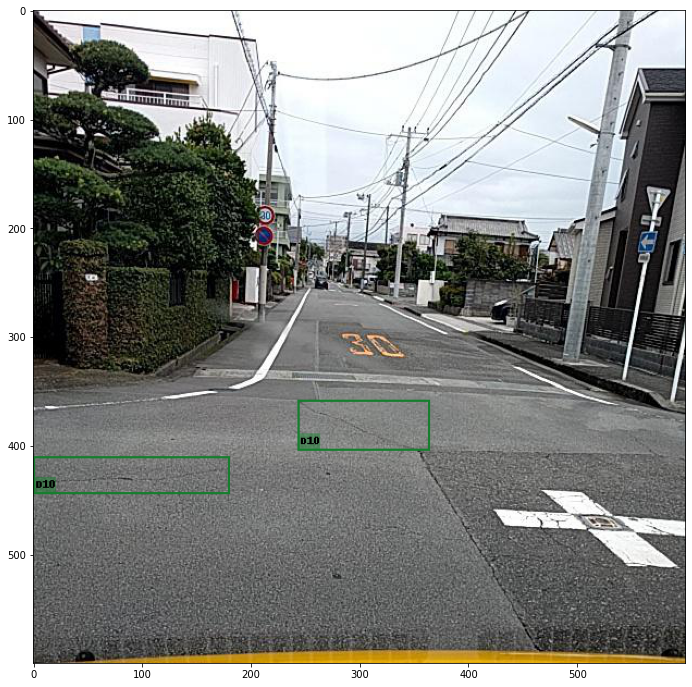

In [18]:
idx = indices[2]
image = dataset._read_image(dataset.image_ids[idx])
boxes, labels = dataset.get_annotation(idx)
image = draw_boxes(
    image, boxes, labels, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.imsave("visualization.png", image)
print("Saved the image to visualization.png")